# Problem Set 1 CS174
---
The following problem set will focus on the lessons on Python and basic string manipulation. Answer the following guide questions by writing functions or code in cells that accomplish the requirements.

1. Write a function to check whether a string is a palindrome. (A palindrome is a string that reads the same forwards and backwards) **1 pt.**

2. Write a function that checks whether a number is prime or not **1 pt.**

3. Load `data/allstar.txt` and create a dictionary where the keys are the verses or chorus numbers, and the values are the chords for that part of the song. **4 pts.**
`{ "verse1": "Am, C, D, G, F, G, G, Bm", "chorus1": "C, Am, G, D, C, Am, G, D, C"..}`

4. Build a dictionary from `data/allstar.txt` where the keys are the unique words, and the values are the number of times the word appeared in the song. **4 pts.**

5. Load `Rick Astley - Never Gonna Give You Up Lyrics _ AZLyrics.com.html` and find out the ff (show the code): **10 pts.**
       - How many unique words are there?
       - List what will Rick Astley never do?
       - Write a function that lists all the unique words and counts the num of occurences. Output the result as a dictionary similar to **Item 4.**
       - Use the dictionary from above to create a word count histogram.
       
### Bonus:
Compare any non-English song (as long as lyrics are Romanized ) and a contemporary one in English, and create word frequency histograms of both. Compare and discuss any interesting findings or insights. **5 pts.**

Deadline **Feb 4 11:59PM**. Submission link to be posted in Moodle. 
Submit the .ipynb file only with name <SURNAME>_<ID NUMBER>.ipynb. 
    
Sample: **"BAUTISTA_110464.ipynb"**

# Libraries

In [39]:
import re
import codecs
from bs4 import BeautifulSoup
from bs4 import Comment
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as pl

# 1. Palindrome

In [2]:
def palindrome(word):
    noSpace = word.replace(" ","")
    if list(noSpace) == list(reversed(noSpace)):
        print(word,"is a palindrome!")
    else:
        print(word,"is not a palindrome!")
    
word = input("Enter a word here:")
palindrome(word)

Enter a word here:lol
lol is a palindrome!


# 2. Prime Number Checker

In [3]:
number = int(input("Enter a number here:"))

if number > 1:
    for x in range(2,number):
        if (number % x) != 0:
            print(number,"is a Prime Number!")
            break
    else:
            print(number,"is NOT a Prime Number!")
else:
    print(number,"is NOT a Prime Number!")

Enter a number here:13
13 is a Prime Number!


# 3. Chords Dictionary

In [4]:
file = open("data/allstar.txt","r")
print(file.read())

[Verse 1]
    G           D           Am             C
Somebody once told me the world is gonna roll me
    G                  D           Am   C
I ain't the sharpest tool in the shed
         G              D             Am
She was looking kinda dumb with her finger and her
C             G           D           Am       C
Thumb in the shape of an "L" on her forehead
 
  G                                 D
Well the years start coming and they don't stop coming
Am                       C
Back to the rules and I hit the ground running
  G                        D
Didn't make sense not to live for fun
    Am                      C
Your brain gets smart but your head gets dumb
 
  G             D
So much to do so much to see
   Am                            C
So what's wrong with taking the back streets
   G                       D
You'll never know if you don't go
   Am                      C
You'll never shine if you don't glow
 
[Chorus]
G                  C           C#m            C
H

In [5]:
r = {}
dictionary = dict()
container = []

def Dictionary(text, elements) :
    print(text)
    for key , value in elements.items():
        print(key)

data = open("data/allstar.txt","r")
check = data.read()

findKeys = re.findall(r"\[([A-Z a-z 0-9 _]+)\]",check)
print(findKeys)

keys = { i : 5 for i in findKeys }
Dictionary("Keys:",keys)

findValues = re.findall(r'(C|Am|G|D|#|F)',check)
print(findValues)

values = { i : 5 for i in findValues }
Dictionary("Values:",values)


['Verse 1', 'Chorus', 'Verse 1', 'Chorus', 'Verse 3', 'Chorus']
Keys:
Verse 1
Chorus
Verse 3
['G', 'D', 'Am', 'C', 'G', 'D', 'Am', 'C', 'G', 'D', 'Am', 'C', 'G', 'D', 'Am', 'C', 'G', 'D', 'Am', 'C', 'G', 'D', 'D', 'Am', 'C', 'G', 'D', 'Am', 'C', 'G', 'D', 'Am', 'C', 'C', 'G', 'C', 'C', '#', 'C', 'G', 'C', 'C', '#', 'C', 'G', 'C', 'C', '#', 'C', 'G', 'F', 'C', 'G', 'D', 'Am', 'C', 'G', 'D', 'Am', 'C', 'G', 'D', 'Am', 'C', 'G', 'D', 'Am', 'C', 'C', 'G', 'C', 'C', '#', 'C', 'G', 'C', 'C', '#', 'C', 'G', 'C', 'C', '#', 'C', 'G', 'F', 'C', 'G', 'C', 'C', '#', 'C', 'G', 'C', 'C', '#', 'C', 'G', 'C', 'C', '#', 'C', 'G', 'F', 'C', 'G', 'D', 'Am', 'C', 'G', 'D', 'Am', 'C', 'G', 'D', 'Am', 'C', 'G', 'D', 'Am', 'C', 'G', 'D', 'Am', 'C', 'G', 'D', 'D', 'Am', 'C', 'G', 'D', 'Am', 'C', 'G', 'D', 'Am', 'C', 'C', 'G', 'C', 'C', '#', 'C', 'G', 'C', 'C', '#', 'C', 'G', 'C', 'C', '#', 'C', 'G', 'F', 'C']
Values:
G
D
Am
C
#
F


# 4. Unique words Dictionary

In [6]:
file = open("data/allstar.txt","r")
print(file.read())

[Verse 1]
    G           D           Am             C
Somebody once told me the world is gonna roll me
    G                  D           Am   C
I ain't the sharpest tool in the shed
         G              D             Am
She was looking kinda dumb with her finger and her
C             G           D           Am       C
Thumb in the shape of an "L" on her forehead
 
  G                                 D
Well the years start coming and they don't stop coming
Am                       C
Back to the rules and I hit the ground running
  G                        D
Didn't make sense not to live for fun
    Am                      C
Your brain gets smart but your head gets dumb
 
  G             D
So much to do so much to see
   Am                            C
So what's wrong with taking the back streets
   G                       D
You'll never know if you don't go
   Am                      C
You'll never shine if you don't glow
 
[Chorus]
G                  C           C#m            C
H

In [7]:
read = open("data/allstar.txt","r")
container = []
with read as f:
    for line in f:
        for word in line.split():
           print(word)

[Verse
1]
G
D
Am
C
Somebody
once
told
me
the
world
is
gonna
roll
me
G
D
Am
C
I
ain't
the
sharpest
tool
in
the
shed
G
D
Am
She
was
looking
kinda
dumb
with
her
finger
and
her
C
G
D
Am
C
Thumb
in
the
shape
of
an
"L"
on
her
forehead
G
D
Well
the
years
start
coming
and
they
don't
stop
coming
Am
C
Back
to
the
rules
and
I
hit
the
ground
running
G
D
Didn't
make
sense
not
to
live
for
fun
Am
C
Your
brain
gets
smart
but
your
head
gets
dumb
G
D
So
much
to
do
so
much
to
see
Am
C
So
what's
wrong
with
taking
the
back
streets
G
D
You'll
never
know
if
you
don't
go
Am
C
You'll
never
shine
if
you
don't
glow
[Chorus]
G
C
C#m
C
Hey
now
you're
an
All
Star
get
your
game
on,
go
play
G
C
C#m
C
Hey
now
you're
a
Rock
Star
get
the
show
on
get
paid
G
C
C#m
And
all
that
glitters
is
gold
C
G
F
C
Only
shooting
stars
break
the
mold
[Verse
1]
G
D
It's
a
cool
place
and
they
say
it
gets
colder
Am
C
You're
bundled
up
now
but
wait
'til
you
get
older
G
D
But
the
media
men
beg
to
differ
Am
C
Judging
by
the
hole
in
the
satell

In [8]:
read = open("data/allstar.txt","r")
r = {}
dictionary = dict()

for line in read:
    line = line.rstrip()
    reader = line.split()
    for words in reader:
        if words in dictionary:
            dictionary[words] = dictionary[words] + 1
        else:
            dictionary[words] = 1
        
print(dictionary)
    
    

{'[Verse': 3, '1]': 2, 'G': 36, 'D': 20, 'Am': 20, 'C': 48, 'Somebody': 2, 'once': 2, 'told': 1, 'me': 2, 'the': 24, 'world': 1, 'is': 6, 'gonna': 1, 'roll': 1, 'I': 8, "ain't": 1, 'sharpest': 1, 'tool': 1, 'in': 3, 'shed': 1, 'She': 1, 'was': 1, 'looking': 1, 'kinda': 1, 'dumb': 3, 'with': 3, 'her': 3, 'finger': 1, 'and': 7, 'Thumb': 1, 'shape': 1, 'of': 1, 'an': 5, '"L"': 1, 'on': 6, 'forehead': 1, 'Well': 2, 'years': 2, 'start': 2, 'coming': 4, 'they': 3, "don't": 6, 'stop': 2, 'Back': 2, 'to': 10, 'rules': 2, 'hit': 2, 'ground': 2, 'running': 2, "Didn't": 2, 'make': 2, 'sense': 2, 'not': 2, 'live': 2, 'for': 3, 'fun': 2, 'Your': 2, 'brain': 2, 'gets': 5, 'smart': 2, 'but': 3, 'your': 6, 'head': 2, 'So': 4, 'much': 4, 'do': 2, 'so': 3, 'see': 2, "what's": 2, 'wrong': 2, 'taking': 2, 'back': 2, 'streets': 2, "You'll": 4, 'never': 5, 'know': 2, 'if': 4, 'you': 7, 'go': 6, 'shine': 2, 'glow': 2, '[Chorus]': 3, 'C#m': 12, 'Hey': 8, 'now': 9, "you're": 8, 'All': 4, 'Star': 8, 'get': 15, 

# 5. Rick Astley Dictionary

In [9]:
load = codecs.open("data/Rick Astley - Never Gonna Give You Up Lyrics _ AZLyrics.com.html", 'r')
print(load.read())

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<meta name="viewport" content="width=device-width, initial-scale=1">
<meta name="description" content="Rick Astley &quot;Never Gonna Give You Up&quot;: We're no strangers to love You know the rules and so do I A full commitment's what I'm thinking of Y..."> 
<meta name="keywords" content="Never Gonna Give You Up lyrics, Rick Astley Never Gonna Give You Up lyrics, Rick Astley lyrics">
<meta name="robots" content="noarchive">
<meta property="og:image" content="//www.azlyrics.com/az_logo_tr.png">
<title>Rick Astley - Never Gonna Give You Up Lyrics | AZLyrics.com</title>

<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.4/css/bootstrap.min.css">
<link rel="stylesheet" href="//www.azlyrics.com/bsaz.css?4">

<!-- HTML5 shim and Respond.js for IE8 support of HTML5 elements and media queries -->
<!--[if lt IE 9]>
<script src="https://oss.maxcdn.com/html

In [10]:
file = BeautifulSoup(open('data/Rick Astley - Never Gonna Give You Up Lyrics _ AZLyrics.com.html'),"html.parser")
lols = file.select('div')[19].get_text()
lines = (line.strip() for line in lols.splitlines())
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
texts = '\n'.join(chunk for chunk in chunks if chunk)

print(texts)



We're no strangers to love
You know the rules and so do I
A full commitment's what I'm thinking of
You wouldn't get this from any other guy
I just wanna tell you how I'm feeling
Gotta make you understand
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
We've known each other for so long
Your heart's been aching, but
You're too shy to say it
Inside, we both know what's been going on
We know the game and we're gonna play it
And if you ask me how I'm feeling
Don't tell me you're too blind to see
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
(Ooh, give you up)
(Ooh, give you u

In [11]:
split = texts.split()
print(split)
len(split)

["We're", 'no', 'strangers', 'to', 'love', 'You', 'know', 'the', 'rules', 'and', 'so', 'do', 'I', 'A', 'full', "commitment's", 'what', "I'm", 'thinking', 'of', 'You', "wouldn't", 'get', 'this', 'from', 'any', 'other', 'guy', 'I', 'just', 'wanna', 'tell', 'you', 'how', "I'm", 'feeling', 'Gotta', 'make', 'you', 'understand', 'Never', 'gonna', 'give', 'you', 'up', 'Never', 'gonna', 'let', 'you', 'down', 'Never', 'gonna', 'run', 'around', 'and', 'desert', 'you', 'Never', 'gonna', 'make', 'you', 'cry', 'Never', 'gonna', 'say', 'goodbye', 'Never', 'gonna', 'tell', 'a', 'lie', 'and', 'hurt', 'you', "We've", 'known', 'each', 'other', 'for', 'so', 'long', 'Your', "heart's", 'been', 'aching,', 'but', "You're", 'too', 'shy', 'to', 'say', 'it', 'Inside,', 'we', 'both', 'know', "what's", 'been', 'going', 'on', 'We', 'know', 'the', 'game', 'and', "we're", 'gonna', 'play', 'it', 'And', 'if', 'you', 'ask', 'me', 'how', "I'm", 'feeling', "Don't", 'tell', 'me', "you're", 'too', 'blind', 'to', 'see', 'Ne

368

In [12]:
noDup = list(dict.fromkeys(split)) #removing duplicates (what Rick Astley will never do?)
print(noDup)
print("Number of unique words: ",len(noDup)) #unique words

["We're", 'no', 'strangers', 'to', 'love', 'You', 'know', 'the', 'rules', 'and', 'so', 'do', 'I', 'A', 'full', "commitment's", 'what', "I'm", 'thinking', 'of', "wouldn't", 'get', 'this', 'from', 'any', 'other', 'guy', 'just', 'wanna', 'tell', 'you', 'how', 'feeling', 'Gotta', 'make', 'understand', 'Never', 'gonna', 'give', 'up', 'let', 'down', 'run', 'around', 'desert', 'cry', 'say', 'goodbye', 'a', 'lie', 'hurt', "We've", 'known', 'each', 'for', 'long', 'Your', "heart's", 'been', 'aching,', 'but', "You're", 'too', 'shy', 'it', 'Inside,', 'we', 'both', "what's", 'going', 'on', 'We', 'game', "we're", 'play', 'And', 'if', 'ask', 'me', "Don't", "you're", 'blind', 'see', '(Ooh,', 'up)', 'give,', 'never', '(Give']
Number of unique words:  88


In [13]:
sets = []#removing the words "never" to get the possible set of words
for line in split:
    if line == "Never":
        sets.append(line)
        for second in split:
            if second != "Never":
                sets.append(second)
print(sets)

['Never', "We're", 'no', 'strangers', 'to', 'love', 'You', 'know', 'the', 'rules', 'and', 'so', 'do', 'I', 'A', 'full', "commitment's", 'what', "I'm", 'thinking', 'of', 'You', "wouldn't", 'get', 'this', 'from', 'any', 'other', 'guy', 'I', 'just', 'wanna', 'tell', 'you', 'how', "I'm", 'feeling', 'Gotta', 'make', 'you', 'understand', 'gonna', 'give', 'you', 'up', 'gonna', 'let', 'you', 'down', 'gonna', 'run', 'around', 'and', 'desert', 'you', 'gonna', 'make', 'you', 'cry', 'gonna', 'say', 'goodbye', 'gonna', 'tell', 'a', 'lie', 'and', 'hurt', 'you', "We've", 'known', 'each', 'other', 'for', 'so', 'long', 'Your', "heart's", 'been', 'aching,', 'but', "You're", 'too', 'shy', 'to', 'say', 'it', 'Inside,', 'we', 'both', 'know', "what's", 'been', 'going', 'on', 'We', 'know', 'the', 'game', 'and', "we're", 'gonna', 'play', 'it', 'And', 'if', 'you', 'ask', 'me', 'how', "I'm", 'feeling', "Don't", 'tell', 'me', "you're", 'too', 'blind', 'to', 'see', 'gonna', 'give', 'you', 'up', 'gonna', 'let', 'y

In [19]:
new = list(dict.fromkeys(sets)) #removing duplicates (what Rick Astley will never do?)
print(new)

['Never', "We're", 'no', 'strangers', 'to', 'love', 'You', 'know', 'the', 'rules', 'and', 'so', 'do', 'I', 'A', 'full', "commitment's", 'what', "I'm", 'thinking', 'of', "wouldn't", 'get', 'this', 'from', 'any', 'other', 'guy', 'just', 'wanna', 'tell', 'you', 'how', 'feeling', 'Gotta', 'make', 'understand', 'gonna', 'give', 'up', 'let', 'down', 'run', 'around', 'desert', 'cry', 'say', 'goodbye', 'a', 'lie', 'hurt', "We've", 'known', 'each', 'for', 'long', 'Your', "heart's", 'been', 'aching,', 'but', "You're", 'too', 'shy', 'it', 'Inside,', 'we', 'both', "what's", 'going', 'on', 'We', 'game', "we're", 'play', 'And', 'if', 'ask', 'me', "Don't", "you're", 'blind', 'see', '(Ooh,', 'up)', 'give,', 'never', '(Give']


In [15]:
rickAstley = re.findall("(?<=Never)(.*)(?=\n)" or "(?<=never)(.*)(?=\n)", texts)

new = list(dict.fromkeys(rickAstley)) #removing duplicates (what Rick Astley will never do?)
print(new)

[' gonna give you up', ' gonna let you down', ' gonna run around and desert you', ' gonna make you cry', ' gonna say goodbye', ' gonna tell a lie and hurt you', ' gonna give, never gonna give']


In [17]:
countN = texts.count('Never') #counting "never" words in the given set
countn = texts.count('never')
total = countN + countn
print("Count of the word never:",total)

Count of the word never: 40


In [20]:
r = {}
dictionary = dict() #unique words and dictionary with words as keys and count as values

for line in split:
    reader = line.split()
    for words in reader:
        if words in dictionary:
            dictionary[words] = dictionary[words] + 1
        else:
            dictionary[words] = 1
        
print(dictionary)

{"We're": 1, 'no': 1, 'strangers': 1, 'to': 4, 'love': 1, 'You': 2, 'know': 5, 'the': 3, 'rules': 1, 'and': 15, 'so': 3, 'do': 1, 'I': 3, 'A': 1, 'full': 1, "commitment's": 1, 'what': 1, "I'm": 4, 'thinking': 1, 'of': 1, "wouldn't": 1, 'get': 1, 'this': 1, 'from': 1, 'any': 1, 'other': 3, 'guy': 1, 'just': 2, 'wanna': 2, 'tell': 9, 'you': 39, 'how': 3, 'feeling': 3, 'Gotta': 2, 'make': 8, 'understand': 2, 'Never': 38, 'gonna': 42, 'give': 10, 'up': 6, 'let': 6, 'down': 6, 'run': 6, 'around': 6, 'desert': 6, 'cry': 6, 'say': 8, 'goodbye': 6, 'a': 6, 'lie': 6, 'hurt': 6, "We've": 2, 'known': 2, 'each': 2, 'for': 2, 'long': 2, 'Your': 2, "heart's": 2, 'been': 4, 'aching,': 2, 'but': 2, "You're": 2, 'too': 3, 'shy': 2, 'it': 4, 'Inside,': 2, 'we': 2, 'both': 2, "what's": 2, 'going': 2, 'on': 2, 'We': 2, 'game': 2, "we're": 2, 'play': 2, 'And': 1, 'if': 1, 'ask': 1, 'me': 2, "Don't": 1, "you're": 1, 'blind': 1, 'see': 1, '(Ooh,': 2, 'up)': 4, 'give,': 2, 'never': 2, '(Give': 2}


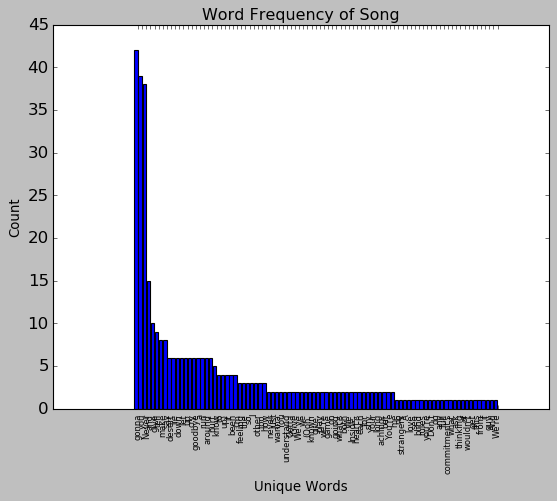

In [62]:
#histogram
#sir sorry di ko talaga ma-declutter :/
counts = Counter(split)

words, values = zip(*counts.items())
sort = np.argsort(values)[::-1]

words = np.array(words)[sort]
values = np.array(values)[sort]

index = np.arange(len(words))

width = 0.5
plt.title('Word Frequency of Song')
plt.xlabel('Unique Words')
plt.ylabel('Count')
plt.bar(indexes, values)
plt.xticks(rotation=90)
plt.xticks(size = 7.5)
plt.yticks(size = 15)
ax.tick_params(axis='both', which='major', pad=100)
plt.xticks(range(N))

plt.xticks(index + width, words)
plt.show()